# Read data from NFL_games_final.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in csv file using pandas and load into data frame

NFL_scores = pd.read_csv('NFL_games_final.csv',
                      header=None,
                      skipinitialspace=True, # this data has some extra whitespace
                      names=['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff',
                             'team_home', 'score_home', 'score_away', 'team_away', 'team_favorite', 
                             'home_spread', 'over_under_line', 'stadium', 'stadium_neutral', 'weather_temperature',
                             'weather_wind_mph', 'weather_humidity', 'weather_detail', 'home_record', 'away_record',
                             'home_points_per_game', 'home_points_against_per_game', 'away_points_per_game',
                             'away_points_against_per_game', 'home_team_win', 'prev_home_record', 'prev_away_record'
                            ],
                      skiprows=1
                     )


In [2]:
team_scores = NFL_scores[['schedule_season', 'score_home', 'score_away']]    # Sub frame with scores and season only
team_scores = team_scores[team_scores['schedule_season'] < 2020]
total_scores = pd.DataFrame(team_scores, columns=['schedule_season', 'score_home', 'score_away', 'score_total'])  # Added total as a column
total_scores['score_total'] = team_scores['score_home'] + team_scores['score_away']    # new total column is score1 and 2 columns added together

# Sample visualization

I believe there is a possible relationship between the total number of points scored (Home team score + Away team score) per game and the season. Over time, the style of football has changed to a much more pass-heavy offensive style, this results in teams going down the field faster by taking more chances and executing more passing plays. Which ultimately leads to more scoring. 

Average Total Points Scored Per Game 2000-2019 Seasons


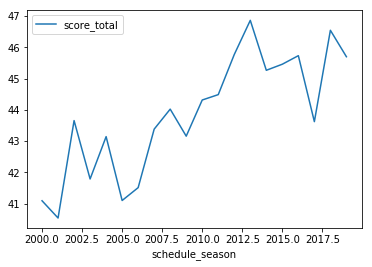

In [3]:
totals = total_scores[['schedule_season', 'score_total']]    # sub-frame with just season and total columns
totals = totals.groupby(by='schedule_season').mean()    # Calculate mean by season and change totals column
tplot = totals.groupby(by='schedule_season').mean().plot.line(y='score_total')    # Create line plot for average total points
print("Average Total Points Scored Per Game 2000-2019 Seasons")    # Label

# How can this be analyized with statistical techniques?

From the table we can tell that the range of average values is (46.87-40.54 =) 6.33 points. In football this is more than a touchdown (6 points) which is a significant change. Considering there were over 200 football games for each season, I believe the change in average is significant enough to support my hypothesis that the scoring has increased since 1999.

I believe another good technique would be to determine the correlation coefficient for the relationship between season and average total score of games.

In [3]:
totals

NameError: name 'totals' is not defined

# What can be hypothesized that might not be included in the dataset?

One possible relationship that is not included in the data, that could help prove my earlier hypothesis, would be a breakdown of offensive plays of each team. We could tell from this how many passing plays a team uses compared to the number of running plays. I believe this would also be related to the season and the total number of points scored in each season.

Another possible relationship not in the data would be weather or time of day for a game. I believe it is possible that these would affect the outcome of a game such as the total scoring or how well a team does. I do not think that you can accurately hypothesize about this relationship because I think the impact that those features have on outcome of a game would vary too much to make an assumption.

# What data features could be engineered here?

I created the total feature in the data to compare total scores over time, it was useful in seeing the average and how scoring changed with each season.

Another feature that may be useful to engineer would be home team point differential. This could be calculated by finding the difference between the home team and away team score but would be a simple visualization about how home team advantage my impact the score of the game.

Another feature that could be created here would be the month or season the game is played in. NFL football games typically range from September-February and the weather changes significantly. This might affect how certain teams play, maybe teams from Southern states like Florida do worse when it gets colder and they have to play in Northern US regions.

UPDATE: I computed the following statistics for each game using the orginal data: home_record, away_record, prev home/away records, points per game, and points against/game for home and away, I also had to compute the home_team_win feature.

# Project 2

The goal of this project is to implement and understand different machine learning algorithms, as well as to present the data previously analyzed in project 1.

# Summarize the data

The data I am using is comprised of thousands of NFL games ranging from 2000-2019. The National Football League is a 32 team American football league in which 16 regular season games are played each year, then there are playoffs each year to determine who wins the Super Bowl (championship game). The features for this dataset include weather, results from the game, as well as some team statistics such as points scored per game. During and after games NFL statisticians record the data and it is available to the public. I had to engineer some of the features in this dataset such as the team records and points per game for each team.

# Classes within the data

One class that is prevalant in the data is whether or not the home team wins, you may be able to guess which team is going to win based on the spread (who is favored and by how many points) as well as the records of each team, although its not guaranteed to be the correct classification based on those features. For example, if the home team has a much better record and is favored in the spread, then they would be more likely to win that game.

Similarly the total score could be classified on whether it would be less than or greater than the over/under line (predicted total score). This would rely on features such as weather temperature, as well points scored per game and points scored against per game for both teams. The lower these features are, the more likely that a game will be under the projected total.

# What parameters could be learned by an unsupervised machine learning algorithm?

I believe an unsupervised machine learning algorithm may be able to model a teams record or at least classify teams as "good" or "bad". I believe if it took data on the spread, as well as a team's average points scored and scored against, and maybe even their record from the previous year then it would be able to separate better performing teams from the worse.

An unsupervised learning algorithm may be able to effectively model a team's score (or they're average deficit, how much they win or lose by) based on the same stats above but including a teams record as well.

In [5]:
NFL_scores.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite,home_spread,...,weather_detail,home_record,away_record,home_points_per_game,home_points_against_per_game,away_points_per_game,away_points_against_per_game,home_team_win,prev_home_record,prev_away_record
0,9/3/2000,2000,1,False,Atlanta Falcons,36,28,San Francisco 49ers,Atlanta Falcons,-6.5,...,DOME,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,9/3/2000,2000,1,False,Buffalo Bills,16,13,Tennessee Titans,Buffalo Bills,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,9/3/2000,2000,1,False,Cleveland Browns,7,27,Jacksonville Jaguars,Jacksonville Jaguars,10.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,9/3/2000,2000,1,False,Dallas Cowboys,14,41,Philadelphia Eagles,Dallas Cowboys,-6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,9/3/2000,2000,1,False,Green Bay Packers,16,20,New York Jets,Green Bay Packers,-2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


# Implementing machine learning algorithms

# Logistic Regression

I will be using logistic regression to try to determine the outcome (home team win/loss) of NFL games

In [6]:
# Splitting the data into training and testing sets

# Train_x will hold data for seasons: 2015, 2016, 2017, 2018
# Test_x will hold data for season: 2019
train_x = NFL_scores.loc[NFL_scores['schedule_season'].astype(int) > 2014]
test_x = train_x.loc[train_x['schedule_season'].astype(int) > 2018]
test_x = test_x.loc[test_x['schedule_season'].astype(int) > 2018]
test_x = test_x.loc[(test_x['schedule_season'].astype(int) < 2020) | (test_x['schedule_week'].astype(int) < 8)]
train_x = train_x.loc[train_x['schedule_season'].astype(int) < 2019]

# Getting output for training and testing data
train_y = train_x['home_team_win']
test_y = test_x[['home_team_win']]

# Getting only the features needed for the training and testing data
train_x = train_x[['schedule_week', 'home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_against_per_game', 'away_points_per_game']]
test_x = test_x[['schedule_week', 'home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_against_per_game', 'away_points_per_game']]
train_x = train_x.fillna(0)
test_x = test_x.fillna(0)

In [11]:
# Defining all functions and parameters here

# Sigmoid function
def sigmoid(input):
    return 1 / (1 + np.exp(-input))


# optimization function
def optimize(x, y, l_rate, iters, params):
    size = x.shape[0]
    weight = params["weight"]
    bias = params["bias"]
    
    for i in range(iters):
        # Call sigmoid function to get out out 0-1
        sig = sigmoid(np.dot(x, weight) + bias)
        # logistic loss function
        loss = -1/size * np.sum(y * np.log(sig)) + (1 - y) * np.log(1 - sig)
        # Calculating weights and biases
        dW = 1/size * np.dot(x.T, (sig-y))
        dB = 1/size * np.sum(sig - y)
        weight = weight - (l_rate * dW)
        bias = bias - (l_rate * dB)
    # Initialize weights and bias
    params["weight"] = weight
    params["bias"] = bias
    return params

params_in = {}
params_in["weight"] = np.zeros(train_x.shape[1])
params_in["bias"] = 0

# Training function
def train(x, y, l_rate, iters):
    params_out = optimize(x, y, l_rate, iters, params_in)
    return params_out

# Using Logistic Regression to Predict 2019 NFL Game Outcomes

In [12]:
predictions = []
params_out = train(train_x, train_y, l_rate = 0.005, iters=500)

# Predict values
test_out = np.dot(test_x[:], params_out["weight"]) + params_out["bias"]
predictions = sigmoid(test_out) >= 1/2

correct, total = 0, 0
for i in range(len(predictions)):
    total += 1
    if predictions[i] == True and test_y.iloc[i].values == 1:
        correct += 1
    elif predictions[i] == False and test_y.iloc[i].values == 0:
        correct += 1
        
print("Percentage of games predicted correctly: " + str(correct/total))

Percentage of games predicted correctly: 0.5994623655913979


# Logistic Regression Learning Curve

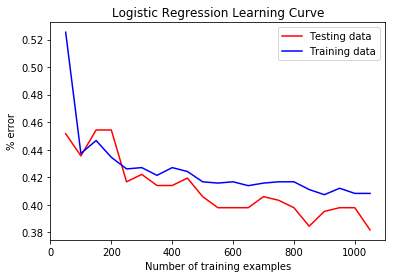

In [13]:
sizes = []
test_errors = []
train_errors = []

# Function to calculate and plot learning curve of logistic regression
def learning_curve(train_x, train_y):
    for i in range(len(train_x.index)):
        if (i % 50 == 0 and i != 0):
            smol_train_x = train_x.head(i)
            smol_train_y = train_y.head(i)

            params_out = train(smol_train_x, smol_train_y, l_rate = 0.005, iters=500)
            #params_out

            train_predictions = []
            test_predictions = []
            # Predict values
            test_output = np.dot(test_x[:], params_out["weight"]) + params_out["bias"]
            test_predictions = sigmoid(test_output) >= 1/2
            train_output = np.dot(train_x[:], params_out["weight"]) + params_out["bias"]
            train_predictions = sigmoid(train_output) >= 1/2
            # print(predictions)
            train_correct, train_total = 0, 0
            test_correct, test_total = 0, 0
            for k in range(len(train_predictions)):
                train_total += 1
                if train_predictions[k] == True and train_y.iloc[k] == 1:
                    train_correct += 1
                elif train_predictions[k] == False and train_y.iloc[k] == 0:
                    train_correct += 1
            for j in range(len(test_predictions)):
                test_total += 1
                if test_predictions[j] == True and test_y.iloc[j].values == 1:
                    test_correct += 1
                elif test_predictions[j] == False and test_y.iloc[j].values == 0:
                    test_correct += 1
            test_errors.append(1-(test_correct/test_total))
            train_errors.append(1-(train_correct/train_total))
            sizes.append(i)

    # print(test_errors)
    # print(train_errors)
    error_data = []
    error_data.append(test_errors)
    error_data.append(train_errors)

    plt.xlabel("Number of training examples")
    plt.ylabel("% error")
    plt.title("Logistic Regression Learning Curve")
    plt.plot(sizes, test_errors, color='r', label="Testing data")
    plt.plot(sizes, train_errors, color='b', label="Training data")
    plt.legend()
    plt.show()
    

learning_curve(train_x, train_y)

# Logistic Regression Generalization Error (not working 12/28)

In [4]:
# First get all training and testing sets (k=4)

g_train_x = NFL_scores.loc[(NFL_scores['schedule_season'].astype(int) > 2014) | (NFL_scores['schedule_season'].astype(int) < 2019)]

g_train_x = g_train_x.fillna(0)

test1 = g_train_x.loc[g_train_x['schedule_season'].astype(int) == 2015]
test2 = g_train_x.loc[g_train_x['schedule_season'].astype(int) == 2016]
test3 = g_train_x.loc[g_train_x['schedule_season'].astype(int) == 2017]
test4 = g_train_x.loc[g_train_x['schedule_season'].astype(int) == 2018]

train1 = g_train_x.loc[g_train_x['schedule_season'].astype(int) > 2015]
train2 = g_train_x.loc[(g_train_x['schedule_season'].astype(int) < 2016) | (g_train_x['schedule_season'].astype(int) > 2016)]
train3 = g_train_x.loc[(g_train_x['schedule_season'].astype(int) < 2017) | (g_train_x['schedule_season'].astype(int) > 2017)]
train4 = g_train_x.loc[g_train_x['schedule_season'].astype(int) < 2018]

test1_x = test1[['schedule_week', 'home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_against_per_game', 'away_points_per_game']]
test2_x = test2[['schedule_week', 'home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_against_per_game', 'away_points_per_game']]
test3_x = test3[['schedule_week', 'home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_against_per_game', 'away_points_per_game']]
test4_x = test4[['schedule_week', 'home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_against_per_game', 'away_points_per_game']]

test1_y = test1[['home_team_win']]
test2_y = test2[['home_team_win']]
test3_y = test3[['home_team_win']]
test4_y = test4[['home_team_win']]

train1_x = train1[['schedule_week', 'home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_against_per_game', 'away_points_per_game']]
train2_x = train2[['schedule_week', 'home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_against_per_game', 'away_points_per_game']]
train3_x = train3[['schedule_week', 'home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_against_per_game', 'away_points_per_game']]
train4_x = train4[['schedule_week', 'home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_against_per_game', 'away_points_per_game']]

train1_y = train1[['home_team_win']]
train2_y = train2['home_team_win']
train3_y = train3['home_team_win']
train4_y = train4['home_team_win']
print(train1_y.shape)
predictions1, predictions2, predictions3, predictions4 = [], [], [], []
params_out1 = train(train1_x, train1_y, l_rate = 0.005, iters=500)
# Predict values
test_out1 = np.dot(test1_x[:], params_out["weight"]) + params_out["bias"]
predictions1 = sigmoid(test_out1) >= 1/2

# The plam was to add all of the errors of the different training sets up and
# average them to get teh generalization error but I couldn't format the data correctly here

(1203, 1)


NameError: name 'train' is not defined

# Multiple Linear Regression

I will be using multiple linear regression to try to predict the points scored by the home and away teams. I will test by taking the difference in the scores and comparing it to the difference from the actual game.

In [22]:
# Splitting the data into training and testing sets

# nn_train_x will hold data for seasons: 2015, 2016, 2017, 2018
# nn_test_x will hold data for season: 2019
train_x = NFL_scores.loc[NFL_scores['schedule_season'].astype(int) > 2014]
test_x = train_x.loc[train_x['schedule_season'].astype(int) > 2018]
test_x = test_x.loc[test_x['schedule_season'].astype(int) > 2018]
test_x = test_x.loc[(test_x['schedule_season'].astype(int) < 2020)]
train_x = train_x.loc[train_x['schedule_season'].astype(int) < 2019]

# Getting output for training and testing data
home_train_y = train_x[['score_home']]
home_test_y = test_x[['score_home']]
away_train_y = train_x[['score_away']]
away_test_y = test_x[['score_away']]

# Getting only the features needed for the training and testing data
home_train_x = train_x[['home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_per_game', 'away_points_against_per_game']]
home_test_x = test_x[['home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_per_game', 'away_points_against_per_game']]
away_train_x = train_x[['home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_against_per_game', 'away_points_per_game']]
away_test_x = test_x[['home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_against_per_game', 'away_points_per_game']]
home_train_x = home_train_x.fillna(0)
home_test_x = home_test_x.fillna(0)
away_train_x = away_train_x.fillna(0)
away_test_x = away_test_x.fillna(0)

# Ignoring data conversion warnings for now
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings('ignore')

In [23]:
# The LeastSquares class holds all functions necessary for performing multiple variable linear regression

class LeastSquares(object):
    
    def __init__(self):
        self.coefficients = []
        
    # To make X two dimensional
    def _reshape_x(self, X):
        return X.reshape(-1, 1)
    
    # Creates a vector of ones with the shape of the data and concatenates
    def _concatenate_ones(self, X):
        ones = np.ones(shape = X.shape[0]).reshape(-1, 1)
        return np.concatenate((ones, X), 1)
    
    # Reshapes and trains the data
    def fit(self, X, y):
        if len(X.shape) == 1:
            X = self._reshape_x(X)
        X = self._concatenate_ones(X)
        self.coefficients = np.linalg.pinv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
    
    
    def predict(self, test):
        # Get inititial bias
        b0 = self.coefficients[0]
        # Other coefficients
        other_betas = self.coefficients[1:]
        prediction = b0
        for xi, bi in zip(test, other_betas):
            prediction += (bi * xi)
        return prediction

In [29]:
def train_and_test(home_train_x, home_train_y, away_train_x, away_train_y, home_test_x, home_test_y, away_test_x, away_test_y):
    h_train_x = home_train_x.values
    a_train_x = away_train_x.values

    model = LeastSquares()
    model.fit(h_train_x, home_train_y)
    model.coefficients
    home_preds, away_preds = [], []
    home_actual, away_actual = [], []

    # Getting home score predictions
    for index, game in home_test_x.iterrows():
        model.fit(h_train_x, home_train_y)
        home_preds.append(model.predict(game))

    # Getting away score predictions
    for index, agame in away_test_x.iterrows():
        model.fit(a_train_x, away_train_y)
        away_preds.append(model.predict(agame))

    # Loop to fill spread array and actual scores
    spread_preds = []
    for i in range(len(home_preds)):
        spread_preds.append(home_preds[i] - away_preds[i])
        home_actual.append(home_test_y.iloc[i])
        away_actual.append(away_test_y.iloc[i])

    correct_outcome = []
    spread_pred_error = []
    spread_correct = []

    results = pd.DataFrame({
        'Home Prediction': np.ravel(home_preds),
        'Away Prediction': np.ravel(away_preds),
        'Predicted score dif': np.ravel(spread_preds),
        'Actual Home Score': np.ravel(home_actual),
        'Actual Away Score': np.ravel(away_actual),
    })

    for index, game in results.iterrows():
        if (results.iloc[index]['Actual Home Score'] < results.iloc[index]['Actual Away Score']) and results.iloc[index]['Predicted score dif'] < 0:
            correct_outcome.append(1)
        elif (results.iloc[index]['Actual Home Score'] > results.iloc[index]['Actual Away Score']) and results.iloc[index]['Predicted score dif'] > 0:
            correct_outcome.append(1)
        else:
            correct_outcome.append(0)
        actual_diff = results.iloc[index]['Actual Home Score'] - results.iloc[index]['Actual Away Score']
        spread_pred_error.append(abs(results.iloc[index]['Predicted score dif'] - actual_diff))
        if (results.iloc[index]['Actual Home Score'] - results.iloc[index]['Actual Away Score']) > results.iloc[index]['Predicted score dif']:
            spread_correct.append(1)
        else:
            spread_correct.append(0)


    results['Correct Predicted Outcome'] = correct_outcome
    results['Spread Predict Error'] = spread_pred_error
    results['Correct Spread'] = spread_correct
    return results

# Multiple Linear Regression Learning Curve

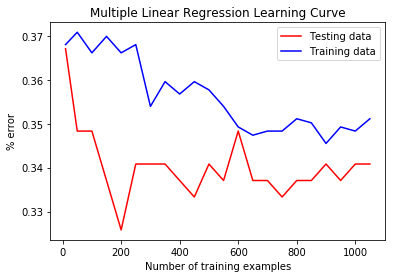

In [30]:
# Calculates and plots the learning curve for multiple linear regression

def linear_learning_curve(home_train_x, home_train_y, away_train_x, away_train_y, home_test_x, home_test_y, away_test_x, away_test_y):
    sizes = []
    error_data = []
    test_errors, train_errors = [], []
    for i in range(len(home_train_x.index)):
        if (i % 50 == 0 and i != 0) or i == 10: 
            sizes.append(i)
            h_smol_train_x = home_train_x.head(i)
            h_smol_train_y = home_train_y.head(i)
            a_smol_train_x = away_train_x.head(i)
            a_smol_train_y = away_train_y.head(i)
            
            home_training_x = home_train_x.values
            away_training_y = home_train_y.values
            h_train_x = h_smol_train_x.values
            a_train_x = a_smol_train_x.values
            model = LeastSquares()
            # model.fit(h_train_x, h_smol_train_y)
            home_train_preds, away_train_preds = [], []
            home_preds, away_preds = [], []
            home_actual, away_actual = [], []
            
            # Getting training home score predictions
            for index, game in home_train_x.iterrows():
                model.fit(h_smol_train_x, h_smol_train_y)
                home_train_preds.append(model.predict(game))
                
            # Getting training home score predictions
            for index, game in away_train_x.iterrows():
                model.fit(a_smol_train_x, a_smol_train_y)
                away_train_preds.append(model.predict(game))
                
            # Getting testing home score predictions
            for index, game in home_test_x.iterrows():
                model.fit(h_smol_train_x, h_smol_train_y)
                home_preds.append(model.predict(game))

            # Getting testing away score predictions
            for index, agame in away_test_x.iterrows():
                model.fit(a_smol_train_x, a_smol_train_y)
                away_preds.append(model.predict(agame))

            # Loop to fill spread array and actual scores
            spread_preds = []
            for i in range(len(home_preds)):
                spread_preds.append(home_preds[i] - away_preds[i])
                home_actual.append(home_test_y.iloc[i])
                away_actual.append(away_test_y.iloc[i])
                
            results = pd.DataFrame({
                'Home Prediction': np.ravel(home_preds),
                'Away Prediction': np.ravel(away_preds),
                'Predicted score dif': np.ravel(spread_preds),
                'Actual Home Score': np.ravel(home_actual),
                'Actual Away Score': np.ravel(away_actual),
            })
            
            total, correct = 0, 0
            for index, game in results.iterrows():
                total += 1
                if (results.iloc[index]['Actual Home Score'] < results.iloc[index]['Actual Away Score']) and results.iloc[index]['Predicted score dif'] < 0:
                    correct += 1
                elif (results.iloc[index]['Actual Home Score'] > results.iloc[index]['Actual Away Score']) and results.iloc[index]['Predicted score dif'] > 0:
                    correct += 1
            test_errors.append(1-(correct/total))          
            train_correct, train_total = 0, 0
            for j in range(len(home_train_preds)):
                train_total += 1
                if (home_train_preds[j] < away_train_preds[j]) and (home_train_y.iloc[j]['score_home'] < away_train_y.iloc[j]['score_away']):
                    train_correct += 1
                elif (home_train_preds[j] > away_train_preds[j]) and (home_train_y.iloc[j]['score_home'] > away_train_y.iloc[j]['score_away']):
                    train_correct += 1
            train_errors.append(1-(train_correct/train_total))
    error_data.append(train_errors) 
    error_data.append(test_errors)
    plt.xlabel("Number of training examples")
    plt.ylabel("% error")
    plt.title("Multiple Linear Regression Learning Curve")
    plt.plot(sizes, test_errors, color='r', label="Testing data")
    plt.plot(sizes, train_errors, color='b', label="Training data")
    plt.legend()
    plt.show()
    
linear_learning_curve(home_train_x, home_train_y, away_train_x, away_train_y, home_test_x, home_test_y, away_test_x, away_test_y)

# Multiple Linear Regression Generalization Error

In [119]:
def get_error(df):
    total, correct = 0, 0
    for index, out in df.iterrows():
        total += 1
        if df.iloc[index]['Correct Predicted Outcome'] == 1:
            correct += 1
    return 1-(correct/total)
    
# Get four different training and testing sets (k=4)

train_x = NFL_scores.loc[(NFL_scores['schedule_season'].astype(int) > 2014) | (NFL_scores['schedule_season'].astype(int) < 2019)]

train_x = train_x.fillna(0)

test1 = train_x.loc[train_x['schedule_season'].astype(int) == 2015]
test2 = train_x.loc[train_x['schedule_season'].astype(int) == 2016]
test3 = train_x.loc[train_x['schedule_season'].astype(int) == 2017]
test4 = train_x.loc[train_x['schedule_season'].astype(int) == 2018]

train1 = train_x.loc[train_x['schedule_season'].astype(int) > 2015]
train2 = train_x.loc[(train_x['schedule_season'].astype(int) < 2016) | (train_x['schedule_season'].astype(int) > 2016)]
train3 = train_x.loc[(train_x['schedule_season'].astype(int) < 2017) | (train_x['schedule_season'].astype(int) > 2017)]
train4 = train_x.loc[train_x['schedule_season'].astype(int) < 2018]

h_train1_x = train1[['home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_per_game', 'away_points_against_per_game']]
h_train2_x = train2[['home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_per_game', 'away_points_against_per_game']]
h_train3_x = train3[['home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_per_game', 'away_points_against_per_game']]
h_train4_x = train4[['home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_per_game', 'away_points_against_per_game']]

h_test1_x = test1[['home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_per_game', 'away_points_against_per_game']]
h_test2_x = test2[['home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_per_game', 'away_points_against_per_game']]
h_test3_x = test3[['home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_per_game', 'away_points_against_per_game']]
h_test4_x = test4[['home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_per_game', 'away_points_against_per_game']]

a_train1_x = train1[['home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_against_per_game', 'away_points_per_game']]
a_train2_x = train2[['home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_against_per_game', 'away_points_per_game']]
a_train3_x = train3[['home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_against_per_game', 'away_points_per_game']]
a_train4_x = train4[['home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_against_per_game', 'away_points_per_game']]

a_test1_x = test1[['home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_against_per_game', 'away_points_per_game']]
a_test2_x = test2[['home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_against_per_game', 'away_points_per_game']]
a_test3_x = test3[['home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_against_per_game', 'away_points_per_game']]
a_test4_x = test4[['home_spread', 'home_record', 'away_record', 'prev_home_record', 'prev_away_record', 'home_points_against_per_game', 'away_points_per_game']]

h_train1_y = train1[['score_home']]
h_train2_y = train2[['score_home']]
h_train3_y = train3[['score_home']]
h_train4_y = train4[['score_home']]

a_train1_y = train1[['score_away']]
a_train2_y = train2[['score_away']]
a_train3_y = train3[['score_away']]
a_train4_y = train4[['score_away']]

h_test1_y = test1[['score_home']]
h_test2_y = test2[['score_home']]
h_test3_y = test3[['score_home']]
h_test4_y = test4[['score_home']]

a_test1_y = test1[['score_away']]
a_test2_y = test2[['score_away']]
a_test3_y = test3[['score_away']]
a_test4_y = test4[['score_away']]

# To estimate generalization error, I will take the average of the standard errors from each of the different training and testing sets
results1 = train_and_test(h_train1_x, h_train1_y, a_train1_x, a_train1_y, h_test1_x, h_test1_y, a_test1_x, a_test1_y)
results2 = train_and_test(h_train2_x, h_train2_y, a_train2_x, a_train2_y, h_test2_x, h_test2_y, a_test2_x, a_test2_y)
results3 = train_and_test(h_train3_x, h_train3_y, a_train3_x, a_train3_y, h_test3_x, h_test3_y, a_test3_x, a_test3_y)
results4 = train_and_test(h_train4_x, h_train4_y, a_train4_x, a_train4_y, h_test4_x, h_test4_y, a_test4_x, a_test4_y)

error1 = get_error(results1)
error2 = get_error(results2)
error3 = get_error(results3)
error4 = get_error(results4)

generalization_error = (error1+error2+error3+error4)/4

print("Generalization Error: " + str(generalization_error))

Generalization Error: 0.35299625468164797


In [31]:
results = train_and_test(home_train_x, home_train_y, away_train_x, away_train_y, home_test_x, home_test_y, away_test_x, away_test_y)

total_errors = 0
games_correct = 0
correct_spreads = 0
adjusted_spread_correct = 0
adjusted_spread_total = 0
for index, game in results.iterrows():
    total_errors += results.iloc[index]['Spread Predict Error']
    games_correct += results.iloc[index]['Correct Predicted Outcome']
    correct_spreads += results.iloc[index]['Correct Spread']
avg_spread_error = total_errors/len(results.index)
percent_correct = games_correct/len(results.index)
percent_spread = correct_spreads/len(results.index)
print(avg_spread_error)
print(percent_correct)
print(percent_spread)

results.head(25)

10.3573931775
0.662921348315
0.426966292135


,Home Prediction,Away Prediction,Predicted score dif,Actual Home Score,Actual Away Score,Correct Predicted Outcome,Spread Predict Error,Correct Spread
0,22.751130,19.909468,2.841661,3,10,0,9.841661,0
1,20.042467,21.940323,-1.897856,27,27,0,1.897856,1
2,20.650756,22.150801,-1.500044,27,30,1,1.499956,0
3,23.690941,19.068663,4.622278,13,43,0,34.622278,0
4,24.528486,18.511765,6.016721,35,17,1,11.983279,1
5,20.042186,22.574000,-2.531813,26,40,1,11.468187,0
6,24.138827,19.023523,5.115304,30,24,1,0.884696,1
7,18.525832,23.694736,-5.168905,10,59,1,43.831095,0
8,22.951303,19.789358,3.161945,28,12,1,12.838055,1
9,23.924724,19.317494,4.607231,33,3,1,25.392769,1


# NFL Data Visualizations

In [161]:
NFL_scores.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite,home_spread,...,weather_detail,home_record,away_record,home_points_per_game,home_points_against_per_game,away_points_per_game,away_points_against_per_game,home_team_win,prev_home_record,prev_away_record
0,9/3/2000,2000,1,False,Atlanta Falcons,36,28,San Francisco 49ers,Atlanta Falcons,-6.5,...,DOME,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,9/3/2000,2000,1,False,Buffalo Bills,16,13,Tennessee Titans,Buffalo Bills,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,9/3/2000,2000,1,False,Cleveland Browns,7,27,Jacksonville Jaguars,Jacksonville Jaguars,10.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,9/3/2000,2000,1,False,Dallas Cowboys,14,41,Philadelphia Eagles,Dallas Cowboys,-6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,9/3/2000,2000,1,False,Green Bay Packers,16,20,New York Jets,Green Bay Packers,-2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


Home Field Advantage

0.5673929098966026


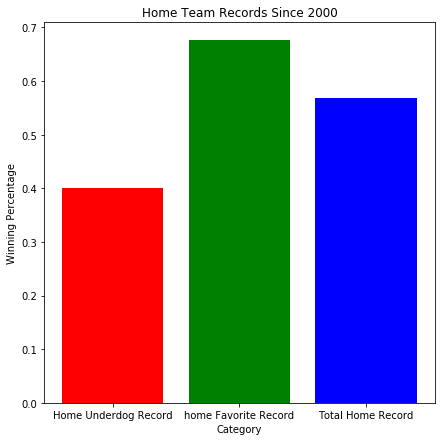

In [31]:
home_favorites, fav_total = 0, 0
home_dogs, dog_total = 0, 0
plt.rcParams["figure.figsize"] = (7, 7)
for index, game in NFL_scores.iterrows():
    if NFL_scores.iloc[index]['home_spread'] < 0:
        fav_total += 1
        if NFL_scores.iloc[index]['score_home'] > NFL_scores.iloc[index]['score_away']:
            home_favorites += 1
    elif  NFL_scores.iloc[index]['home_spread'] > 0:
        dog_total += 1
        if NFL_scores.iloc[index]['score_home'] > NFL_scores.iloc[index]['score_away']:
            home_dogs += 1
            
home_dog_record = home_dogs/dog_total
home_fav_record = home_favorites/fav_total
home_record = (home_dogs+home_favorites)/(dog_total+fav_total)
print(home_record)

x = ["Home Underdog Record", "home Favorite Record", "Total Home Record"]
x_s = [i for i, _ in enumerate(x)]
plt.bar(x_s, [home_dog_record, home_fav_record, home_record], color=['red', 'green', 'blue'])
plt.ylabel("Winning Percentage")
plt.xlabel("Category")
plt.title("Home Team Records Since 2000")
plt.xticks(x_s, x)
plt.show()


Heatmap of All Possible NFL Scores

Text(0,0.5,'Away Team Score')

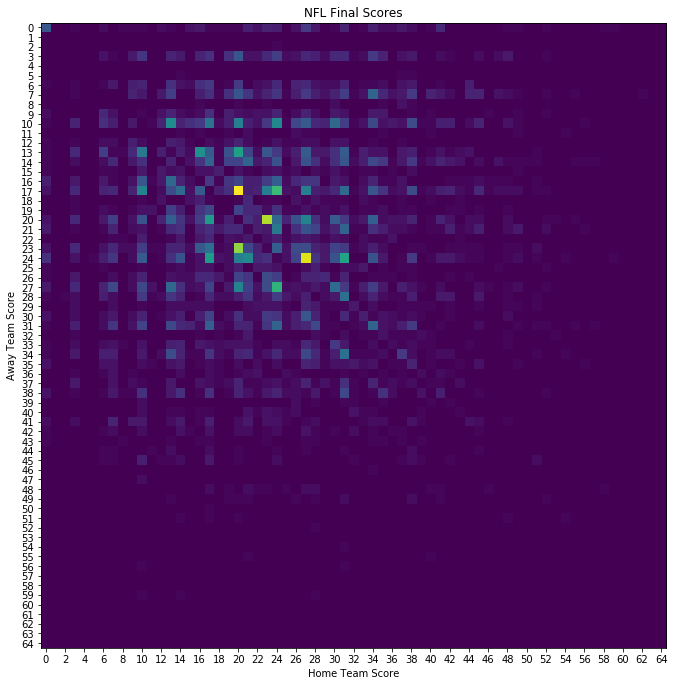

In [29]:
score_m = np.zeros(shape=(65, 65))
plt.rcParams["figure.figsize"] = (11.5, 11.5)
for index, game in NFL_scores.iterrows():
    h = NFL_scores.iloc[index]['score_home']
    a = NFL_scores.iloc[index]['score_away']
    score_m[a][h] += 1

fig, ax = plt.subplots()
im = ax.imshow(score_m)
ax.set_title("NFL Final Scores")
a = plt.xticks(np.arange(0, 65, 2))
b = plt.yticks(np.arange(0, 65, 1))
plt.xlabel("Home Team Score")
plt.ylabel("Away Team Score")
# ax.set_xticklabels(i for i in range(65))
# ax.set_yticklabels(i for i in range(65))


2019 Team Records by Week

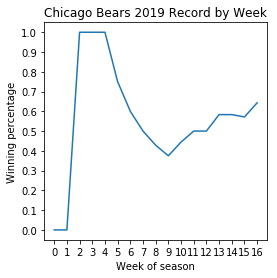

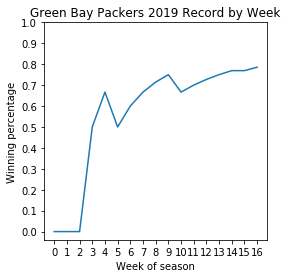

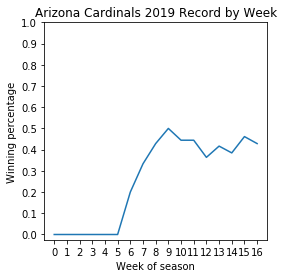

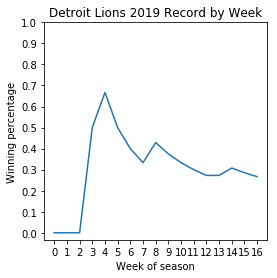

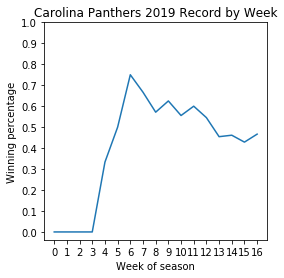

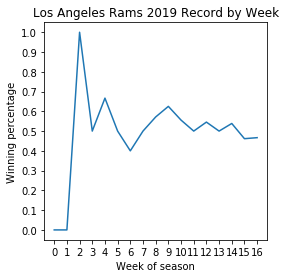

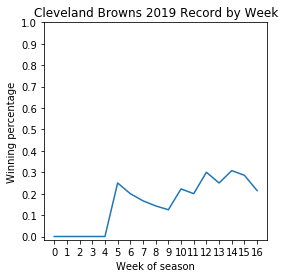

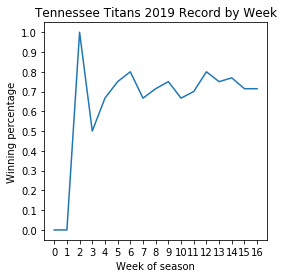

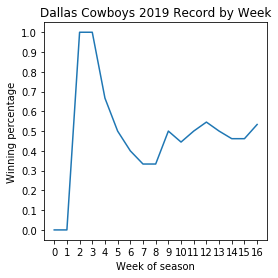

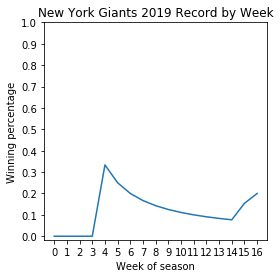

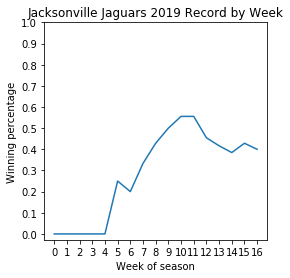

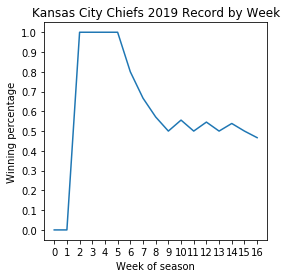

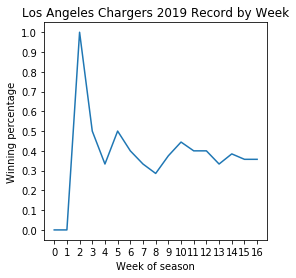

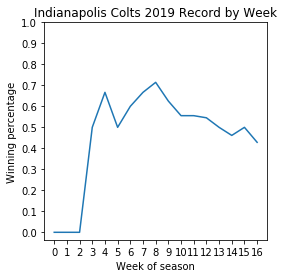

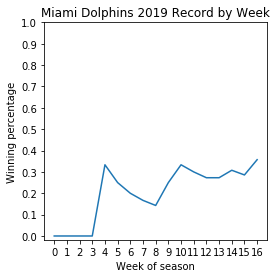

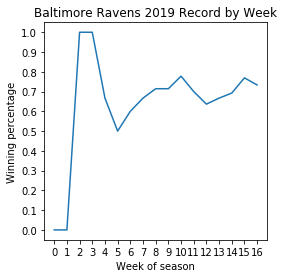

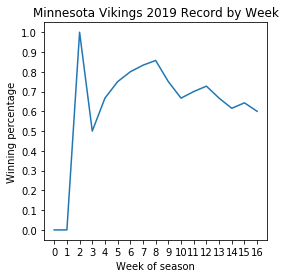

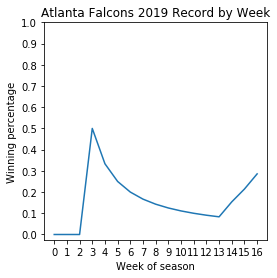

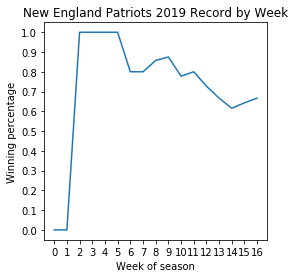

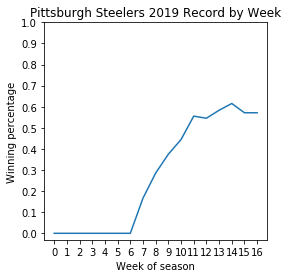

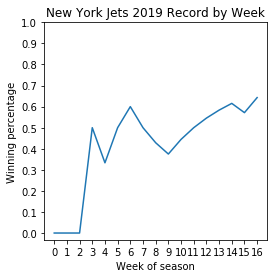

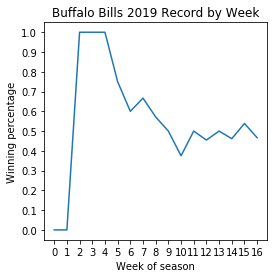

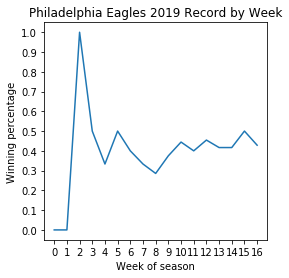

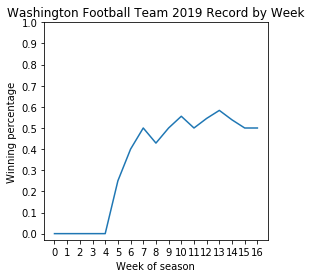

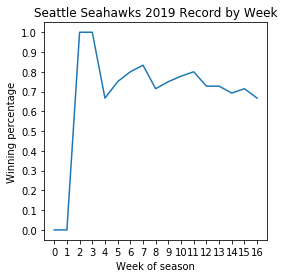

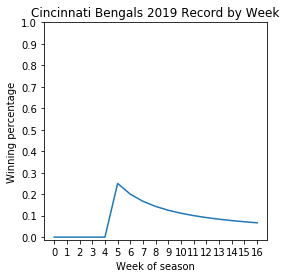

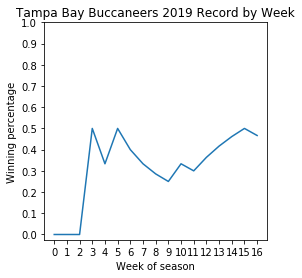

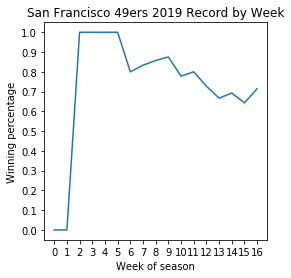

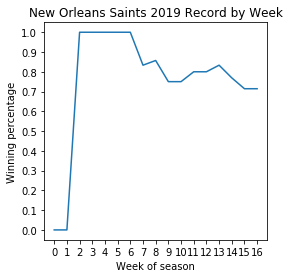

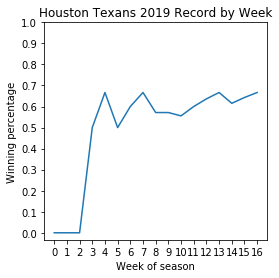

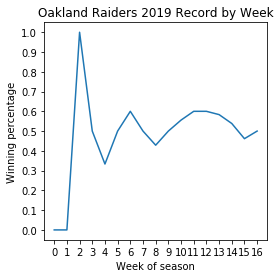

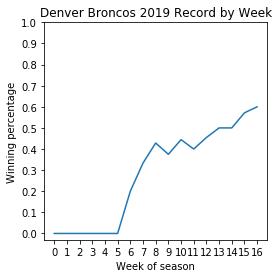

In [124]:
sample = NFL_scores.loc[NFL_scores['schedule_season'].astype(int) == 2019]
sample = sample.loc[NFL_scores['schedule_week'].astype(int) < 18]
sample = sample.fillna(0)
team_names = []
records = []

for index, game in sample.iterrows():
    if NFL_scores.iloc[index]['team_home'] not in team_names:
        team_names.append(NFL_scores.iloc[index]['team_home'])
    if NFL_scores.iloc[index]['team_away'] not in team_names:
        team_names.append(NFL_scores.iloc[index]['team_away'])

for team in team_names:
    records.append([team, 0])
    
for i, game in sample.iterrows():
    home_team = game['team_home']
    away_team = game['team_away']
    for rec in records:
        if rec[0] == home_team:
            rec.append(game['home_record'])
        elif rec[0] == away_team:
            rec.append(game['away_record'])
            
plt.rcParams["figure.figsize"] = (4, 4)
for team in records:
    plt.figure()
    plt.xlabel("Week of season")
    plt.ylabel("Winning percentage")
    plt.title(team[0] + " 2019 Record by Week")
    plt.plot([i for i in range(17)], team[1:18])
    plt.yticks(np.arange(0, 1.1, .1))
    plt.xticks(np.arange(0, 17, 1))
    plt.show()

Using box and whisker plots to show distribution of predicted spreads as well as actual spreads

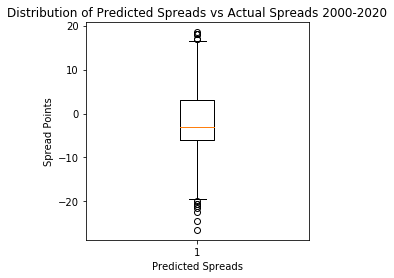

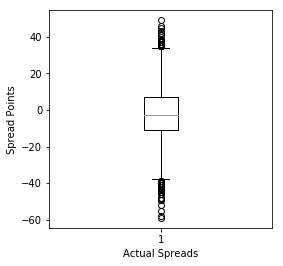

In [125]:
NFL_scores.head()
actual_spreads, predicted_spreads = [], []

for index, game in NFL_scores.iterrows():
    actual_spreads.append(NFL_scores.iloc[index]['score_away'] - NFL_scores.iloc[index]['score_home'])
    predicted_spreads.append(NFL_scores.iloc[index]['home_spread'])
    
plt.title("Distribution of Predicted Spreads vs Actual Spreads 2000-2020")
plt.ylabel("Spread Points")
plt.boxplot(predicted_spreads)
plt.xlabel("Predicted Spreads")
plt.show()
plt.boxplot(actual_spreads)
plt.ylabel("Spread Points")
plt.xlabel("Actual Spreads")
plt.show()

Animated bar plot of NFC East team's points scored for 2019 season

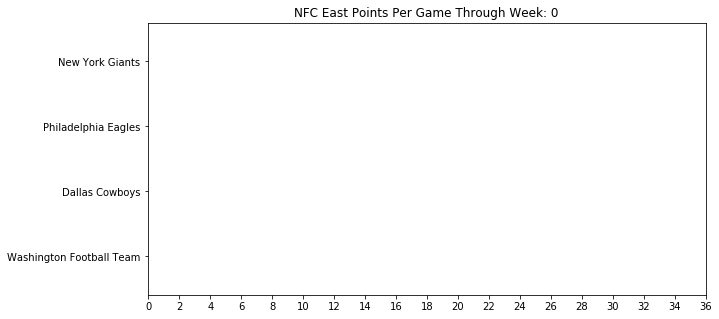

In [152]:
import matplotlib.animation as animation
from IPython.display import HTML

def init():
    ax.clear()
    ax.set_ylim(0, 35)

NFC_east = ["Washington Football Team", "Dallas Cowboys", "Philadelphia Eagles", "New York Giants"]
ppgs = []
ppgs_ag = []
WSH, DAL, PHI, NYG = [], [], [], []
WSH_ag, DAL_ag, PHI_ag, NYG_ag = [], [], [], []
temp = NFL_scores.loc[NFL_scores['schedule_season'].astype(int) == 2019]
temp = temp.loc[NFL_scores['schedule_week'].astype(int) < 18]
temp = temp.fillna(0)

selected = temp.loc[(temp['team_home'] == NFC_east[0]) | (temp['team_home'] == NFC_east[1]) | (temp['team_home'] == NFC_east[2]) | (temp['team_home'] == NFC_east[3])
                   | (temp['team_away'] == NFC_east[0]) | (temp['team_away'] == NFC_east[1]) | (temp['team_away'] == NFC_east[2]) | (temp['team_away'] == NFC_east[3])]
selected = selected.reset_index()


for index, game in selected.iterrows():
        if selected.iloc[index]['team_home'] == NFC_east[0]:
            WSH.append(selected.iloc[index]['home_points_per_game'])
            WSH_ag.append(selected.iloc[index]['home_points_against_per_game'])
        if selected.iloc[index]['team_home'] == NFC_east[1]:
            DAL.append(selected.iloc[index]['home_points_per_game'])
            DAL_ag.append(selected.iloc[index]['home_points_against_per_game'])
        if selected.iloc[index]['team_home'] == NFC_east[2]:
            PHI.append(selected.iloc[index]['home_points_per_game'])
            PHI_ag.append(selected.iloc[index]['home_points_against_per_game'])
        if selected.iloc[index]['team_home'] == NFC_east[3]:
            NYG.append(selected.iloc[index]['home_points_per_game'])
            NYG_ag.append(selected.iloc[index]['home_points_against_per_game'])
        if selected.iloc[index]['team_away'] == NFC_east[0]:
            WSH.append(selected.iloc[index]['away_points_per_game'])
            WSH_ag.append(selected.iloc[index]['away_points_against_per_game'])
        if selected.iloc[index]['team_away'] == NFC_east[1]:
            DAL.append(selected.iloc[index]['away_points_per_game'])
            DAL_ag.append(selected.iloc[index]['away_points_against_per_game'])
        if selected.iloc[index]['team_away'] == NFC_east[2]:
            PHI.append(selected.iloc[index]['away_points_per_game'])
            PHI_ag.append(selected.iloc[index]['away_points_against_per_game'])
        if selected.iloc[index]['team_away'] == NFC_east[3]:
            NYG.append(selected.iloc[index]['away_points_per_game'])
            NYG_ag.append(selected.iloc[index]['away_points_against_per_game'])

for j in range(len(WSH)):
    ppgs.append([WSH[j], DAL[j], PHI[j], NYG[j]])
    ppgs_ag.append([WSH_ag[j], DAL_ag[j], PHI_ag[j], NYG_ag[j]])

fig, ax = plt.subplots(figsize=(10, 5))

def plot_bar_ppg(week):
    ax.clear()
    ax.barh(NFC_east, ppgs[week])
    ax.set_xticks(np.arange(0, 37, 2))
    ax.set_title("NFC East Points Per Game Through Week: " + str(week))
    week += 1
    

def plot_bar_ppg_ag(week1):
    ax2.clear()
    ax2.barh(NFC_east, ppgs_ag[week1])
    ax2.set_xticks(np.arange(0, 37, 2))
    ax2.set_title("NFC East Points Against Per Game Through Week: " + str(week1))
    week1 += 1

    
animator = animation.FuncAnimation(fig, plot_bar_ppg, frames=range(0, 16), interval=425)   
vid = animator.to_html5_video()
HTML(vid)

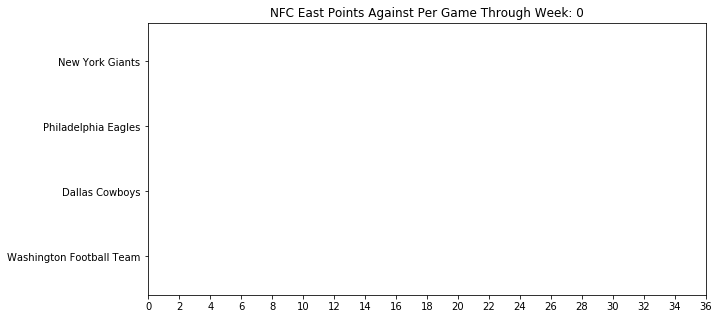

In [151]:
fig2, ax2 = plt.subplots(figsize=(10, 5))
animator2 = animation.FuncAnimation(fig2, plot_bar_ppg_ag, frames=range(0, 16), interval=425)
vid2 = animator2.to_html5_video()
HTML(vid2)

# Make a hypothesis about the data

Based on the presented data, I believe home teams generally outscore away teams. In other words, home team score is greater than away team score. **I believe there is a statistically significant difference between home and away scores.**

In [20]:
import math

all_data = NFL_scores.loc[NFL_scores['schedule_season'].astype(int) < 2020]
all_data = all_data.fillna(0)
size = len(all_data)
size

5324

Sample size = 5324 = n1 = n2

In [22]:
avg_home = all_data['score_home'].mean()
avg_away = all_data['score_away'].mean()
print("Average Home Team Score: " + str(avg_home))
print("Average Away Team Score: " + str(avg_away))

Average Home Team Score: 23.1598422239
Average Away Team Score: 20.7103681443


In [23]:
all_home = all_data.loc[:,'score_home'].values
all_away = all_data.loc[:, 'score_away'].values
home_std = np.std(all_home)
away_std = np.std(all_away)

print("Standard deviation of home scores: " + str(home_std))
print("Standard deviation of away scores: " + str(away_std))

Standard deviation of home scores: 10.3813008645
Standard deviation of away scores: 10.0871985926


In [24]:
comb_std = math.sqrt((((size-1)*(home_std**2))+((size-1)*(away_std**2)))/((size*2)-2))
print("Combined standard deviation for home and away scores: " + str(comb_std))

Combined standard deviation for home and away scores: 10.235306128427633


In [25]:
se = comb_std*(math.sqrt((1/size)+(1/size)))
print("Standard error for home and away scores: " + str(se))

Standard error for home and away scores: 0.1983795089727037


In [26]:
t_st = (avg_home-avg_away)/se
t_st

12.347414772442088

Calculating the p-value (two tailed, over 10000 degrees of freedom, and a test stat of 12.347) we get a p-value of **< 0.001** which is statistically significant. In addition, the critical value is 1.645, which is much smaller than 12.347.

Therefore there is enough evidence to confirm my hypothesis that home teams outscore away teams.

**Same Hypothesis Using Only Data From 2019 Games**

In [44]:
data2019 = NFL_scores.loc[NFL_scores['schedule_season'].astype(int) == 2019]
data2019 = data2019.fillna(0)
l_size = len(data2019)
l_size

267

Average Home Team Score: 22.872659176
Average Away Team Score: 22.8314606742


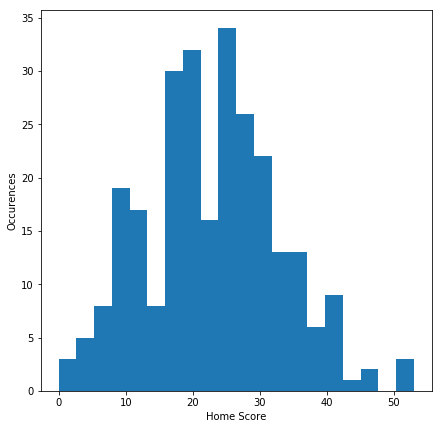

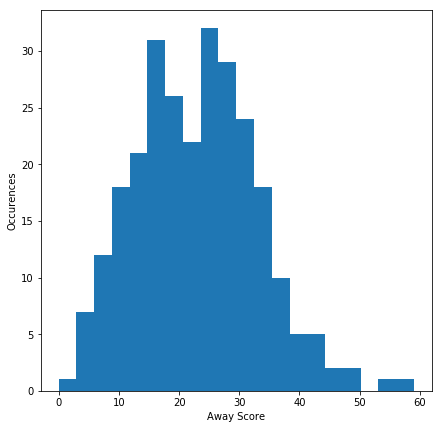

In [50]:
avg_home = data2019['score_home'].mean()
avg_away = data2019['score_away'].mean()
print("Average Home Team Score: " + str(avg_home))
print("Average Away Team Score: " + str(avg_away))

plt.xlabel("Home Score")
plt.ylabel("Occurences")
h = plt.hist(data2019.loc[:, 'score_home'], bins=20)
plt.show()

plt.xlabel("Away Score")
plt.ylabel("Occurences")
i = h = plt.hist(data2019.loc[:, 'score_away'], bins=20)
plt.show()

In [54]:
#### all_home = data2019.loc[:,'score_home'].values
all_away = data2019.loc[:, 'score_away'].values
home_std = np.std(all_home)
away_std = np.std(all_away)

print("Standard deviation of home scores: " + str(home_std))
print("Standard deviation of away scores: " + str(away_std))

NameError: name 'all_home' is not defined

In [50]:
comb_std = math.sqrt((((l_size-1)*(home_std**2))+((l_size-1)*(away_std**2)))/((l_size*2)-2))
print("Combined standard deviation for home and away scores: " + str(comb_std))

Combined standard deviation for home and away scores: 10.12275648074147


In [51]:
se = comb_std*(math.sqrt((1/l_size)+(1/l_size)))
print("Standard error for home and away scores: " + str(se))

Standard error for home and away scores: 0.8761090297291683


In [52]:
t_st = (avg_home-avg_away)/se
t_st

0.047024400473758485

Calculating the p-value (two tailed, 532 degrees of freedom, and a test stat of 0.04702) we get a p-value of **0.481257** which is  **not** statistically significant. In addition, the critical value is 1.645, which is much larger than the 0.04702 test statistic **0.481257 > 0.05**

Therefore there is not enough evidence to confirm my hypothesis that home teams outscore away teams based on data from the 2019 season.

**Extra functions used beforehand to engineer new features and add to csv file**

In [61]:
# Function to add records from previous season to for home and away team of each game
def add_prev_records(df):
    games = games.reindex(columns = games.columns.tolist() + ['prev_home_record','prev_away_record'])
    for index, game in games.iterrows():
        if int(game['schedule_season']) == 2000:
            pass
        else:
            hometeam = game['team_home']
            awayteam = game['team_away']
            curr_season = int(game['schedule_season'])
            hgames, hwins, agames, awins = 0, 0, 0, 0
            for tindex, tgame in games.iterrows():
                if int(tgame['schedule_season']) == (curr_season-1):
                    if tgame['team_home'] == hometeam:
                        hgames += 1
                        if tgame['score_home'] > tgame['score_away']:
                            hwins += 1
                    elif tgame['team_away'] == hometeam:
                        hgames += 1
                        if tgame['score_home'] < tgame['score_away']:
                            hwins += 1
                    if tgame['team_home'] == awayteam:
                        agames += 1
                        if tgame['score_home'] > tgame['score_away']:
                            awins += 1
                    elif tgame['team_away'] == awayteam:
                        agames += 1
                        if tgame['score_home'] < tgame['score_away']:
                            awins += 1
            if hgames > 0:
                games.at[index, 'prev_home_record'] = hwins/hgames
            if agames > 0:
                games.at[index, 'prev_away_record'] = awins/agames


# Function to add current home and away team records to data
def add_records(df):
    games = games.reindex(columns = games.columns.tolist() + ['home_record','away_record'])
    for index, game in games.iterrows():
        home_team = game['team_home']
        away_team = game['team_away']
        curr_season = game['schedule_season']
        htotal, hwins = 0, 0
        atotal, awins = 0, 0
        for tindex, tgame in games.iterrows():
            if tgame['schedule_season'] == curr_season:
                if tindex < index:
                    if tgame['team_home'] == home_team:
                        htotal += 1
                        if tgame['score_home'] > tgame['score_away']:
                            hwins += 1
                    elif tgame['team_away'] == home_team:
                        htotal += 1
                        if tgame['score_home'] < tgame['score_away']:
                            hwins += 1
                    elif tgame['team_home'] == away_team:
                        atotal += 1
                        if tgame['score_home'] > tgame['score_away']:
                            awins += 1
                    elif tgame['team_away'] == away_team:
                        atotal += 1
                        if tgame['score_home'] < tgame['score_away']:
                            awins += 1
        if htotal > 0:
            games.at[index, 'home_record'] = hwins/htotal
        if atotal > 0:
            games.at[index, 'away_record'] = awins/atotal

# Function which calculates points per game and points against per game for both home and away teams
def add_ppg(df):
    games = games.reindex(columns = games.columns.tolist() + ['home_points_per_game','home_points_against_per_game', 'away_points_per_game','away_points_against_per_game', 'home_team_win'])
    for index, game in games.iterrows():
            if game['score_home'] > game['score_away']:
                games.at[index, 'home_team_win'] = 1
            elif game['score_home'] == game['score_away']:
                games.at[index, 'home_team_win'] = 0.5
            elif game['score_home'] < game['score_away']:
                games.at[index, 'home_team_win'] = 0
            home_team = game['team_home']
            away_team = game['team_away']
            curr_season = game['schedule_season']
            hgames, hpoints, hpoints_against = 0, 0, 0
            agames, apoints, apoints_against = 0, 0, 0
            if  index == 5440:
                break
            for tindex, tgame in games.iterrows():
                if tgame['schedule_season'] == curr_season:
                    if tindex < index:
                        if tgame['team_home'] == home_team:
                            hgames += 1
                            hpoints += int(tgame['score_home'])
                            hpoints_against += int(tgame['score_away'])
                        elif tgame['team_away'] == home_team:
                            hgames += 1
                            hpoints += int(tgame['score_away'])
                            hpoints_against += int(tgame['score_home'])
                        elif tgame['team_home'] == away_team:
                            agames += 1
                            apoints += int(tgame['score_home'])
                            apoints_against += int(tgame['score_away'])
                        elif tgame['team_away'] == away_team:
                            agames += 1
                            apoints += int(tgame['score_away'])
                            apoints_against += int(tgame['score_home'])
            if hgames > 0:
                games.at[index, 'home_points_per_game'] = hpoints/hgames
                games.at[index, 'home_points_against_per_game'] = hpoints_against/hgames
            if agames > 0:
                games.at[index, 'away_points_per_game'] = apoints/agames
                games.at[index, 'away_points_against_per_game'] = apoints_against/agames
    